Alicia Sigmon

als333@pitt.edu 

12/03/17

# Discourse Analysis of the Australian Radio Talkback Corpus

This file starts where [process-art-corpus.ipynb](https://github.com/Data-Science-for-Linguists/Discourse-Analysis-ART-Corpus/blob/master/process-art-corpus.ipynb) left off, and is the analysis portion of this project.

### Table of Contents
- [About the Data](#About-the-Data)
- [Plan](#Plan)
- [Resource for Gender Analysis](#Resource-for-Gender-Analysis)
- [Reading in Data Frames](#Reading-in-Data-Frames)
    - [Data Frames Summary](#Data-Frames-Summary)
    - [Splitting Speakers by Role](#Splitting-Speakers-by-Role)
    - [All Presenters](#All-Presenters)
- [Distribution of Speakers](#Distribution-of-Speakers)
    - [How many Speakers are there for each Role?](#How-many-Speakers-are-there-for-each-Role?)
    - [How many Males vs. Females?](#How-many-Males-vs.-Females?)
    - [How are Males and Females distributed across Roles?](#How-are-Males-and-Females-distributed-across-Roles?)
        - [Gender Equality](#Gender-Equality)
- [Comparison by Speaker Type](#Comparison-by-Speaker-Type)
    - [Analysis](#Analysis)
- [Comparison by Gender](#Comparison-by-Gender)
- [Back Channels](#Back-Channels)
    - [What are the Back Channels? Which ones are most common?](#What-are-the-Back-Channels?-Which-ones-are-most-common?)
    - [What Speaker Type has the most Back Channels?](#What-Speaker-Type-has-the-most-Back-Channels?)
    - [What Speaker Type has the most number of Back Channels uttered during their lines?](#What-Speaker-Type-has-the-most-number-of-Back-Channels-uttered-during-their-lines?)
    - [What Gender utters the most Back Channels?](#What-Gender-utters-the-most-Back-Channels?)
    - [What Gender has the most Back Channels uttered while they are speaking?](#What-Gender-has-the-most-Back-Channels-uttered-while-they-are-speaking?)
    - [Are Men more likely to utter Back Channels when a Women or Man is speaking? How about the other way around?](#Are-Men-more-likely-to-utter-Back-Channels-when-a-Women-or-Man-is-speaking?-How-about-the-other-way-around?)
    - [How do Male and Female Most Common Back Channels Compare?](#How-do-Male-and-Female-Most-Common-Back-Channels-Compare?)
- [Presenter Gender Analysis](#Presenter-Gender-Analysis)

## About the Data
- 27 transcribed recordings of samples of national, regional and commercial Australian talkback radio from 2004 to 2006.
- *raw files* and text files
- Closed Data


## Plan 
- Original Format
- Formatting
- Speaker Analyses
- Gender Analyses 
- Back Channel Analyses

## Resource for Gender Analysis
Language Log Article: [Men Interrupt More than Women](http://languagelog.ldc.upenn.edu/nll/?p=13422)
*Discuss this article here, and then use in analysis for final_report.md.*

In [1]:
%pprint

Pretty printing has been turned OFF


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import nltk
import pandas as pd

# visualization tools
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

## Reading in Data Frames

In [4]:
# reading in data frames
speaker_df=pd.read_csv("data_files/Speakers.csv")
art_df=pd.read_csv("data_files/Texts.csv")
bk_df=pd.read_csv("data_files/Back_Channels.csv")

# speaker_df.head()
# art_df.head()
# bk_df.head()

### Data Frames Summary

- speaker_df
    - data frame of all unique speakers
- art_df
    - data frame of each line of text
- bk_df
    - data frame of all back channels

In [5]:
# modifying data frame column names
speaker_df.columns = ["Speaker","Segment","Speaker_Type","Gender","Name","Number_of_Utterances"]
speaker_df = speaker_df.set_index("Speaker")

print("Speaker Data Frame:")
speaker_df.head()

art_df.columns = ["Speaker","Utterance_Number","Segment","Speaker_Type","Gender","Text","Word_Toks","Num_Words","Avg_Word_Length","Sents","Num_Sents"]
art_df = art_df.set_index(keys=["Speaker","Utterance_Number"])

print("Lines of Text Data Frame:")
art_df.head()

bk_df.columns = ["","Speaker","Speaker_Type","Speaker_Gender","Back_Channel","Line_Speaker","Segment_Utterance_Number","Segment","Line_Speaker_Type","Line_Speaker_Gender"]
bk_df = bk_df.set_index("")

print("Back Channel Data Frame:")
bk_df.head()

Speaker Data Frame:


,Segment,Speaker_Type,Gender,Name,Number_of_Utterances
Speaker,,,,,
ABCE1-C1,ABCE1,C,F,Suzanne,17
ABCE1-C10,ABCE1,C,F,Beth,17
ABCE1-C11,ABCE1,C,F,Lynne,10
ABCE1-C12,ABCE1,C,M,Jack,12
ABCE1-C2,ABCE1,C,F,Lisa,13


Lines of Text Data Frame:


,,Segment,Speaker_Type,Gender,Text,Word_Toks,Num_Words,Avg_Word_Length,Sents,Num_Sents
Speaker,Utterance_Number,,,,,,,,,
ABCE1-P1,1,ABCE1,P,M,Thanks for that John Hall now John Hall will b...,"['Thanks', 'for', 'that', 'John', 'Hall', 'now...",80,4.700000,"[""Thanks for that John Hall now John Hall will...",2
ABCE1-E1,2,ABCE1,E,M,I guess yeah yeah <laughs>.,"['I', 'guess', 'yeah', 'yeah', '.']",5,3.000000,['I guess yeah yeah .'],1
ABCE1-P1,3,ABCE1,P,M,He's also known <E1 sounds reasonable> for his...,"['He', ""'s"", 'also', 'known', 'for', 'his', 'a...",159,5.062893,"[""He's also known for his ability to open cos...",3
ABCE1-E1,4,ABCE1,E,M,Okay.,"['Okay', '.']",2,2.500000,['Okay.'],1
ABCE1-P1,5,ABCE1,P,M,Jeanne Villani does and we'll find out the sec...,"['Jeanne', 'Villani', 'does', 'and', 'we', ""'l...",50,3.980000,"[""Jeanne Villani does and we'll find out the s...",1


Back Channel Data Frame:


,Speaker,Speaker_Type,Speaker_Gender,Back_Channel,Line_Speaker,Segment_Utterance_Number,Segment,Line_Speaker_Type,Line_Speaker_Gender
,,,,,,,,,
0,ABCE1-E1,E,M,sounds reasonable,ABCE1-P1,3,ABCE1,P,M
1,ABCE1-C1,C,F,laughs,ABCE1-P1,10,ABCE1,P,M
2,ABCE1-P1,P,M,yes,ABCE1-C1,11,ABCE1,C,F
3,ABCE1-E1,E,M,mm,ABCE1-C1,11,ABCE1,C,F
4,ABCE1-E1,E,M,mm,ABCE1-C1,11,ABCE1,C,F


### Splitting Speakers by Role

In [6]:
# dataframe of presenters
P_df=speaker_df.loc[speaker_df["Speaker_Type"]=='P',:]

# dataframe of callers
C_df=speaker_df.loc[speaker_df["Speaker_Type"]=='C',:]

# dataframe of experts
E_df=speaker_df.loc[speaker_df["Speaker_Type"]=='E',:]

### All Presenters

In [7]:
P_df

,Segment,Speaker_Type,Gender,Name,Number_of_Utterances
Speaker,,,,,
ABCE1-P1,ABCE1,P,M,Simon Marnie,155
ABCE2-P1,ABCE2,P,M,Simon Marnie,233
ABCE3-P1,ABCE3,P,F,Lynne Haultain,129
ABCE3-P2,ABCE3,P,F,Jurate Sasnaitis,56
ABCE4-P1,ABCE4,P,F,Kelly Higgins-Devine,23
ABCNE1-P1,ABCNE1,P,M,Trevor Jackson,64
ABCNE2-P1,ABCNE2,P,M,Trevor Jackson,58
COME1-P1,COME1,P,M,Luke Bona,67
COME2-P1,COME2,P,M,Luke Bona,68


## Distribution of Speakers

### How many Speakers are there for each Role?
- 31 Presenters
- 362 Callers
- 37 Experts

P     31
C    362
E     37
Name: Speaker_Type, dtype: int64

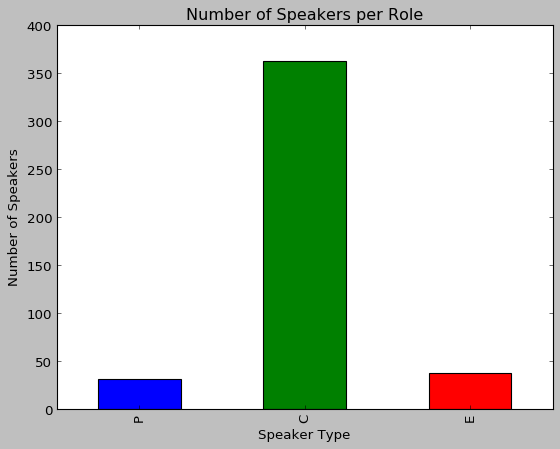

In [8]:
# Number of Speakers per Role
figure=speaker_df["Speaker_Type"].value_counts().reindex(["P","C","E"]).plot.bar()
speaker_df["Speaker_Type"].value_counts().reindex(["P","C","E"])
plt.title("Number of Speakers per Role")
plt.xlabel("Speaker Type")
plt.ylabel("Number of Speakers")
plt.show()

# saving the figure
figure.figure.savefig("images/role_totals.png")

There are a lot of Callers, but very few presenters and experts in the corpus. This is because many callers call in during the show, while Presenters and Experts have a more steady position in each show.

### How many Males vs. Females?
- 218 Males
- 212 Females

Number of Males and Females are about equal with slightly more Males.

M    218
F    212
Name: Gender, dtype: int64

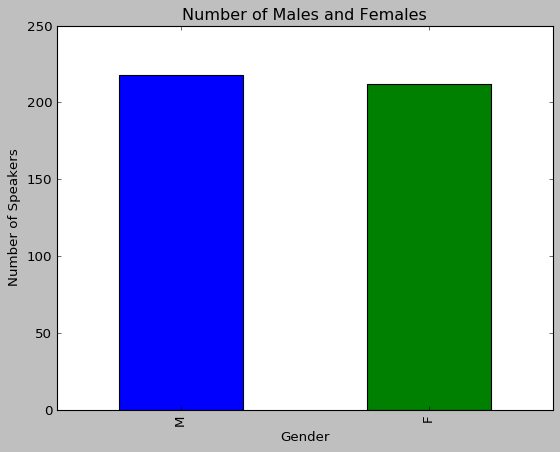

In [9]:
figure=speaker_df["Gender"].value_counts().reindex(["M","F"]).plot.bar()
speaker_df["Gender"].value_counts().reindex(["M","F"])
plt.title("Number of Males and Females")
plt.xlabel("Gender")
plt.ylabel("Number of Speakers")
plt.show()

# saving the figure
figure.figure.savefig("images/gender_totals.png")

### How are Males and Females distributed across Roles?

M    21
F    10
Name: Gender, dtype: int64

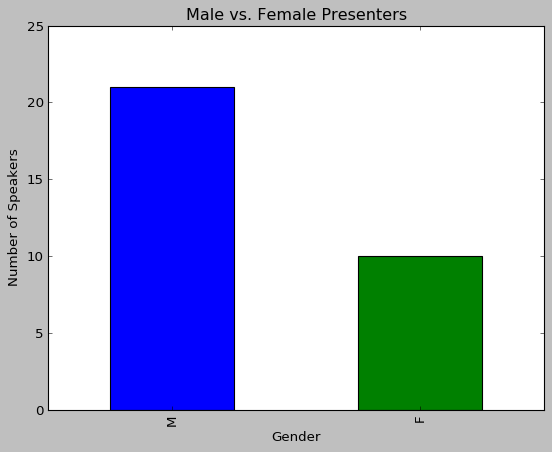

M    171
F    191
Name: Gender, dtype: int64

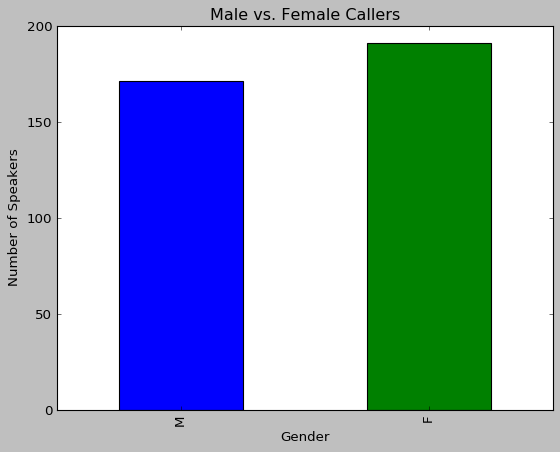

M    26
F    11
Name: Gender, dtype: int64

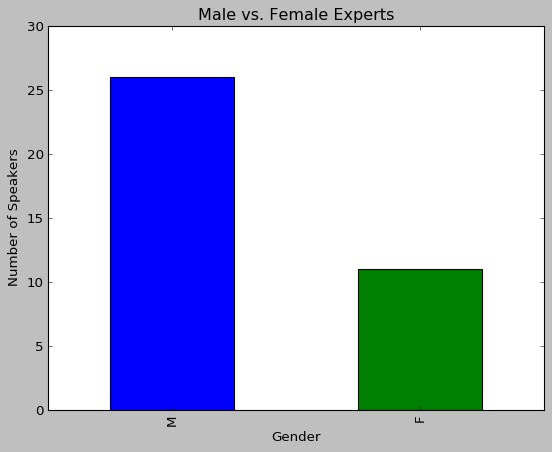

In [10]:
# Presenters:
fig1 = P_df["Gender"].value_counts().reindex(["M","F"]).plot.bar()
P_df["Gender"].value_counts().reindex(["M","F"])
plt.title("Male vs. Female Presenters")
plt.xlabel("Gender")
plt.ylabel("Number of Speakers")
plt.show()

# saving the figure
fig1.figure.savefig("images/presenter_genders.png")

# Callers:
fig2 = C_df["Gender"].value_counts().reindex(["M","F"]).plot.bar()
C_df["Gender"].value_counts().reindex(["M","F"])
plt.title("Male vs. Female Callers")
plt.xlabel("Gender")
plt.ylabel("Number of Speakers")
plt.show()

# saving the figure
fig2.figure.savefig("images/caller_genders.png")

# Experts:
fig3 = E_df["Gender"].value_counts().reindex(["M","F"]).plot.bar()
E_df["Gender"].value_counts().reindex(["M","F"])
plt.title("Male vs. Female Experts")
plt.xlabel("Gender")
plt.ylabel("Number of Speakers")
plt.show()

# saving the figure
fig3.figure.savefig("images/expert_genders.png")

### Gender Equality

**Ratio of Gender by Role (Male : Female):**
- Presenters: 2.1 : 1
- Callers: .895 : 1
- Experts: 2.36: 1

There are about twice as many Male Presenters and Experts as compared to Females, but about equal numbers of Male and Female Callers, with slightly more Females.

**Conclusion:** Presenters and Experts are predominantly Male and Callers are more equally distributed but with more Females than Males.

Presenters are the show's hosts, hired by the program. Experts are professionals talking about their line of work. Callers however can be anyone who calls the radio station. Presenters and Experts are the people chosen by the radio to talk, and they are mostly males. Why are there more men than women working in this radio station? Is radio a generally predominantly male industry across the US?

**Further Analysis Needed:** I will do further research and analysis on gender equality before making conclusions about the Australian Radio Talkback Corpus.

## Comparison by Speaker Type
- Number of Turns
- Number of Sentences
- Number of Words
- Average Word Length
- Average Sentence Length
- Average Number of Turns

In [11]:
# Comparing Presenter, Caller, and Expert Data Frames

# this gives a table of all the information
P_df.describe()
C_df.describe()
E_df.describe()


# SHOULD THIS SUMMARY BE HERE OR IN THE MARKDOWN CELL BELOW?
print("Summary of Important Information:")
print("Presenters:")
print("Total Number of Turns:\t",str(P_df["Number_of_Utterances"].sum())) # 1470
print("Average Number of Turns:",str(P_df["Number_of_Utterances"].mean())) # 122.5
print("Standard Deviation:\t",str(P_df["Number_of_Utterances"].std())) # 129.38

print("\nCallers:")
print("Total Number of Turns:\t",C_df["Number_of_Utterances"].sum()) # 1505
print("Average Number of Turns:",str(C_df["Number_of_Utterances"].mean()))  # 11.23
print("Standard Deviation:\t",str(C_df["Number_of_Utterances"].std())) # 7.97

      
print("\nExperts:")
print("Total Number of Turns:\t",str(E_df["Number_of_Utterances"].sum())) # 1464
print("Average Number of Turns:",str(E_df["Number_of_Utterances"].mean()))  # 91.5
print("Standard Deviation:\t",str(E_df["Number_of_Utterances"].std())) # 86.82

,Number_of_Utterances
count,31.000000
mean,113.838710
std,96.088188
min,23.000000
25%,59.500000
50%,71.000000
75%,136.000000
max,491.000000


,Number_of_Utterances
count,362.000000
mean,8.627072
std,6.729160
min,1.000000
25%,4.000000
50%,7.000000
75%,12.000000
max,63.000000


,Number_of_Utterances
count,37.000000
mean,64.243243
std,76.512310
min,6.000000
25%,18.000000
50%,27.000000
75%,87.000000
max,294.000000


Summary of Important Information:
Presenters:
Total Number of Turns:	 3529
Average Number of Turns: 113.838709677
Standard Deviation:	 96.0881875412

Callers:
Total Number of Turns:	 3123
Average Number of Turns: 8.6270718232
Standard Deviation:	 6.72915982542

Experts:
Total Number of Turns:	 2377
Average Number of Turns: 64.2432432432
Standard Deviation:	 76.5123103405


In [12]:
# data frames for Presenter, Caller, and Expert Lines
P_art_df=art_df.loc[art_df["Speaker_Type"]=='P',:]
C_art_df=art_df.loc[art_df["Speaker_Type"]=='C',:]
E_art_df=art_df.loc[art_df["Speaker_Type"]=='E',:]

In [13]:
# Presenter vs. Caller vs. Experts

# utterances
print("Turns:")
art_df["Speaker_Type"].value_counts().reindex(["P","C","E"])

# sentences
print("Number of Sentences:")
P_art_df["Num_Sents"].sum()
C_art_df["Num_Sents"].sum() 
E_art_df["Num_Sents"].sum()

# words
print("Number of Words:")
P_art_df["Num_Words"].sum()
C_art_df["Num_Words"].sum() 
E_art_df["Num_Words"].sum()

# avg word length
print("Average Word Length:")
P_art_df["Avg_Word_Length"].mean()
C_art_df["Avg_Word_Length"].mean()
E_art_df["Avg_Word_Length"].mean()

# avg sent length
print("Average Sentence Length:")
P_art_df["Num_Words"].sum()/P_art_df["Num_Sents"].sum()
C_art_df["Num_Words"].sum()/C_art_df["Num_Sents"].sum() 
E_art_df["Num_Words"].sum()/E_art_df["Num_Sents"].sum() 

print("Average Number of Turns:")
P_df["Number_of_Utterances"].mean()
C_df["Number_of_Utterances"].mean()
E_df["Number_of_Utterances"].mean()

Turns:


P    3529
C    3123
E    2377
Name: Speaker_Type, dtype: int64

Number of Sentences:


5276

4653

4064

Number of Words:


87282

82759

94808

Average Word Length:


3.507288378196753

3.2425688455302364

3.4460386862363968

Average Sentence Length:


16.543214556482184

17.786159467010531

23.328740157480315

Average Number of Turns:


113.83870967741936

8.6270718232044192

64.243243243243242

### Analysis

Summary of Numbers Above:
- Total Number of Turns:
    - Presenters > Callers > Experts 
- Total Number of Sentences:
    - Presenters > Callers > Experts
- Total Number of Words:
    - Experts > Presenters > Callers
- Average Word Length:
    - About Equal
- Average Sentence Length:
    - Expert > Caller > Presenter 
        - Presenter and Callers are about equal 
- Average Number of Turns:
    - Presenters > Experts > Callers

Important Discoveries:
- More Callers with fewer turns
- Fewer Presenters with more turns
- Experts have the longest sentences

On average, Presenters speak the most throughout the Australian Radio Talkback Corpus. There are many Callers in each show, but they do not speak for very long. The Presenters probably talk the most because they are leading the show. 

Across the corpus, **the Presenters have the most turns and sentences, followed by Callers and then Experts.**
    
Average sentence length is much more indicative of speaker type than word length. Based on the Australian Radio Talkback Corpus, **Experts' sentences are the longest** with an average of about 23 words per sentence, while Callers have on average 17 words per sentence and Presenters about 16 words per sentence. Without a statistical analysis, I cannot be certain whether or not this finding is significant for this data. However, this finding makes sense, because Experts will talk at length about their topic, so they may have longer, more complicated sentences.

## Comparison by Gender
- Number of Turns
- Number of Sentences
- Number of Words
- Average Word Length
- Average Sentence Length
- Average Number of Turns

In [14]:
# Males vs. Females 

# utterances
print("Utterances:")
art_df["Gender"].value_counts().reindex(["M","F"])

# data frames for male and female lines
M_art_df=art_df.loc[art_df["Gender"]=='M',:]
F_art_df=art_df.loc[art_df["Gender"]=='F',:]

# sentences
print("Number of Sentences:")
M_art_df["Num_Sents"].sum()
F_art_df["Num_Sents"].sum() 

# words
print("Number of Words:")
M_art_df["Num_Words"].sum()
F_art_df["Num_Words"].sum() 

# avg word length
print("Average Word Length:")
M_art_df["Avg_Word_Length"].mean()
F_art_df["Avg_Word_Length"].mean()

# avg sent length
print("Average Sentence Length:")
M_art_df["Num_Words"].sum()/M_art_df["Num_Sents"].sum()
F_art_df["Num_Words"].sum()/F_art_df["Num_Sents"].sum()

# building male and female data frames from speaker_df
M_df=speaker_df.loc[speaker_df["Gender"]=='M',:]
F_df=speaker_df.loc[speaker_df["Gender"]=='F',:]

print("Average Number of Turns:")
M_df["Number_of_Utterances"].mean()
F_df["Number_of_Utterances"].mean()

Utterances:


M    4995
F    4034
Name: Gender, dtype: int64

Number of Sentences:


8039

5954

Number of Words:


158401

106448

Average Word Length:


3.4604173885660998

3.3242965524401384

Average Sentence Length:


19.704067670108223

17.878401074907625

Average Number of Turns:


22.912844036697248

19.028301886792452

Summary of Key Information:
- Number of Turns:
    - Males > Females
- Number of Sentences:
    - Males > Females
- Number of Words:
    - Males > Females
- Average Word Length:
    - About Equal
- Average Sentence Length:
    - Males > Females
- Average Number of Turns:
    - Males > Females

## Back Channels

### What are the Back Channels? Which ones are most common?

In [15]:
bk_df["Back_Channel"].value_counts()[:20]
bk_df["Back_Channel"].value_counts()[-20:]

mm              625
yeah            576
laughs          450
yes             342
inaudible       303
mhm             232
right           174
laugh           150
yep             140
okay             90
oh               66
uh               52
no               41
oh okay          31
ah               27
that's right     24
um               24
thank you        20
alright          19
well             18
Name: Back_Channel, dtype: int64

it's okay               1
aren't I good           1
thanks Bernard          1
yum                     1
just be careful         1
enjoy                   1
is disappearing yeah    1
yeah good luck          1
Tuh                     1
wasn't a f              1
can you do it hard      1
well our our arg        1
I I think thuh uh       1
gotcha mate             1
ai                      1
fridge                  1
one of                  1
that's the classic      1
that's going on         1
oh tub 'n'              1
Name: Back_Channel, dtype: int64

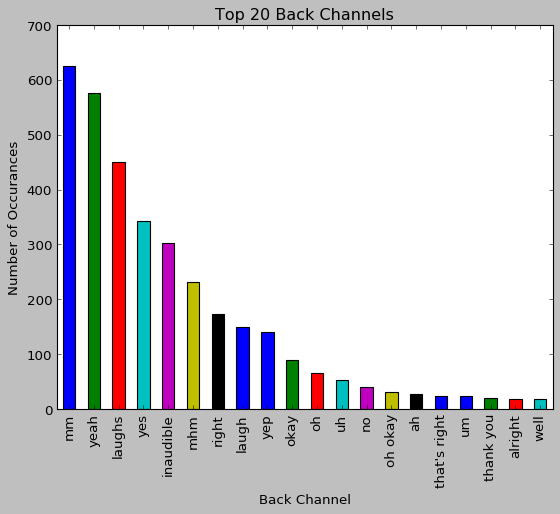

In [16]:
figure = bk_df["Back_Channel"].value_counts()[:20].plot.bar()
plt.title("Top 20 Back Channels")
plt.xlabel("Back Channel")
plt.ylabel("Number of Occurances")
plt.show()

# saving the figure
figure.figure.savefig("images/top_20_back_channels.png")

Unfortunately, a lot of the back channels were inaudible, with 303 being inaudible. However, the top back channels make sense and I do not expect that having the inaudible utterances would impact the results greatly.

Laughter is marked as plural and singlular because when 2 speakers laughed at the same time, the format was <speaker1 and speaker2 laugh>.

In [17]:
# What speakers uttered the most Back Channels?
bk_df["Speaker"].value_counts()[:20]

COMNE4-E1    270
NAT8-P1      195
COME3-E1     147
ABCE2-E1     146
COMNE1-P1    140
COMNE1-P2    124
COME1-E1     110
NAT4-P1       98
ABCE3-P1      94
ABCE2-E2      93
COMNE4-P1     90
NAT1-P1       80
ABCE1-E1      79
COME5-P2      75
ABCE2-P1      66
ABCE3-P2      54
COME6-P1      51
ABCNE2-E1     50
COMNE5-P1     50
NAT6-E1       46
Name: Speaker, dtype: int64

### What Speaker Type has the most Back Channels?

In [18]:
# number of back channels per speaker type
bk_df["Speaker_Type"].value_counts().reindex(["P","C","E"])

P    1625
C    1691
E    1328
Name: Speaker_Type, dtype: int64

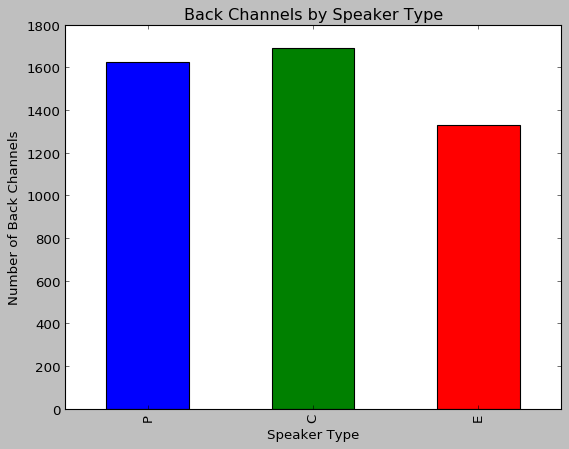

In [19]:
figure = bk_df["Speaker_Type"].value_counts().reindex(["P","C","E"]).plot.bar()
plt.title("Back Channels by Speaker Type")
plt.xlabel("Speaker Type")
plt.ylabel("Number of Back Channels")
plt.show()

# saving the figure
figure.figure.savefig("images/back_channel_speaker_types.png")

Callers (closely followed by Presenters) utter the most Back Channels.

**Conclusions:** 
- There are many Callers with few lines each, so they're constantly hearing new information upon being introduced to the show.
- Presenters stay throughout the entire show, so they have plenty of opportunities to utter back channels.
- Experts have the fewest number of turns and sentences, and their biggest purpose is to explain a complicated topic. This means that the other speakers will be uttering more back channels for the complicated topics.

### What Speaker Type has the most number of Back Channels uttered during their lines?

In [20]:
bk_df["Line_Speaker_Type"].value_counts().reindex(["P","C","E"])

P    1612
C    1454
E    1580
Name: Line_Speaker_Type, dtype: int64

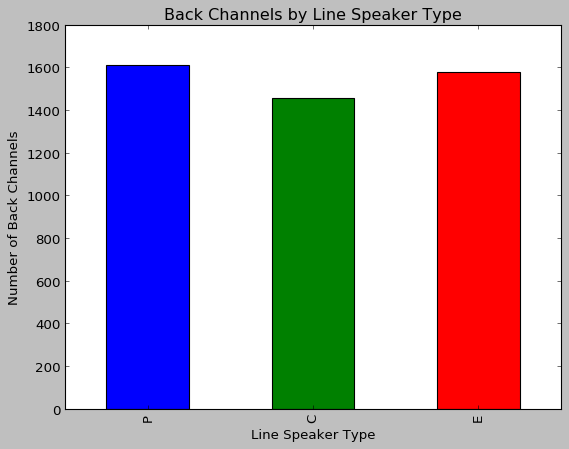

In [21]:
figure = bk_df["Line_Speaker_Type"].value_counts().reindex(["P","C","E"]).plot.bar()
plt.title("Back Channels by Line Speaker Type")
plt.xlabel("Line Speaker Type")
plt.ylabel("Number of Back Channels")
plt.show()

# saving the figure
figure.figure.savefig("images/back_channel_line_speaker_types.png")

Presenter Lines have the most number of Back Channels, closely followed by Expert Lines. There are over 1000 fewer Caller lines containing back channels. 

I believe Experts and Presenters have more back channels uttered while they are talking, because:
- Experts have the longest sentences and are giving detailed information for many of their lines, so Presenters and Callers would utter back channels to show they are listening (and maybe understanding).
- Presenters are taking many turns and uttering more sentences, so there is more information coming from the Presenters.

**Potential Conclusion:** More turns and sentences and longer sentences lead to more back channels.

### What Gender utters the most Back Channels?

M    2403
F    2243
Name: Speaker_Gender, dtype: int64

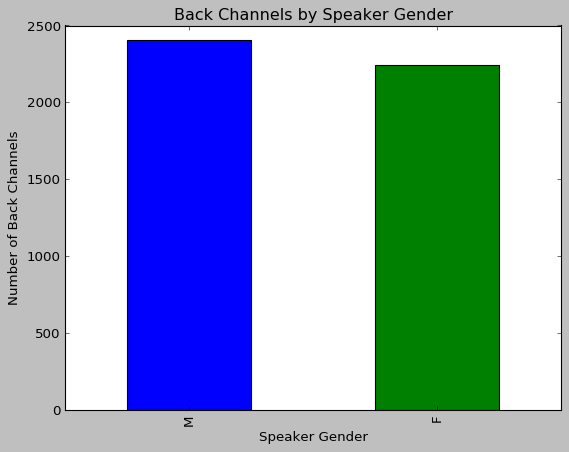

In [22]:
# number of back channels per gender
bk_df["Speaker_Gender"].value_counts().reindex(["M","F"])

figure = bk_df["Speaker_Gender"].value_counts().reindex(["M","F"]).plot.bar()
plt.title("Back Channels by Speaker Gender")
plt.xlabel("Speaker Gender")
plt.ylabel("Number of Back Channels")
plt.show()

# saving the figure
figure.figure.savefig("images/back_channel_speaker_genders.png")

### What Gender has the most Back Channels uttered while they are speaking?

M    2575
F    2071
Name: Line_Speaker_Gender, dtype: int64

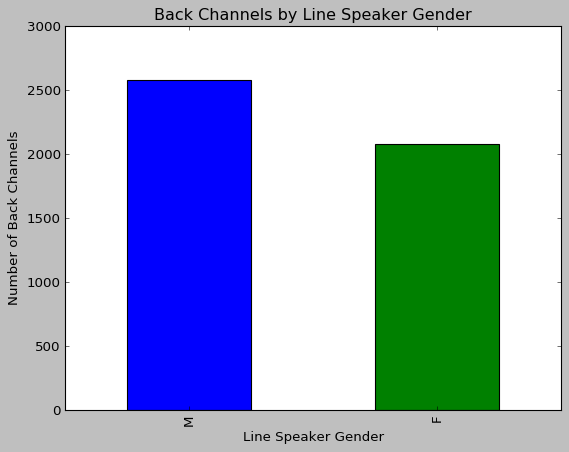

In [23]:
# number of lines with back channels per gender
bk_df["Line_Speaker_Gender"].value_counts().reindex(["M","F"])

figure = bk_df["Line_Speaker_Gender"].value_counts().reindex(["M","F"]).plot.bar()
plt.title("Back Channels by Line Speaker Gender")
plt.xlabel("Line Speaker Gender")
plt.ylabel("Number of Back Channels")
plt.show()

# saving the figure
figure.figure.savefig("images/back_channel_line_speaker_genders.png")

**Conclusion:** Men produced more back channels, and more back channels were uttered while they were talking.

### Are Men more likely to utter Back Channels when a Women or Man is speaking? How about the other way around?

In [24]:
# Male Back Channels
M_bk_df=bk_df.loc[bk_df["Speaker_Gender"]=='M',:]
                  
# Female Back Channels
F_bk_df=bk_df.loc[bk_df["Speaker_Gender"]=='F',:]

# peaking at the data frames
M_bk_df.head()
F_bk_df.head()

,Speaker,Speaker_Type,Speaker_Gender,Back_Channel,Line_Speaker,Segment_Utterance_Number,Segment,Line_Speaker_Type,Line_Speaker_Gender
,,,,,,,,,
0,ABCE1-E1,E,M,sounds reasonable,ABCE1-P1,3,ABCE1,P,M
2,ABCE1-P1,P,M,yes,ABCE1-C1,11,ABCE1,C,F
3,ABCE1-E1,E,M,mm,ABCE1-C1,11,ABCE1,C,F
4,ABCE1-E1,E,M,mm,ABCE1-C1,11,ABCE1,C,F
5,ABCE1-E1,E,M,mm,ABCE1-C1,11,ABCE1,C,F


,Speaker,Speaker_Type,Speaker_Gender,Back_Channel,Line_Speaker,Segment_Utterance_Number,Segment,Line_Speaker_Type,Line_Speaker_Gender
,,,,,,,,,
1,ABCE1-C1,C,F,laughs,ABCE1-P1,10,ABCE1,P,M
7,ABCE1-C1,C,F,mhm,ABCE1-P1,14,ABCE1,P,M
8,ABCE1-C1,C,F,uh,ABCE1-E1,23,ABCE1,E,M
11,ABCE1-C1,C,F,laugh,ABCE1-C1,24,ABCE1,C,F
14,ABCE1-C1,C,F,mm,ABCE1-E1,31,ABCE1,E,M


The Gender of the Line's Speaker during All Instances of Male Back Channels:


M    1508
F     895
Name: Line_Speaker_Gender, dtype: int64

The Gender of the Line's Speaker during All Instances of Female Back Channels:


M    1067
F    1176
Name: Line_Speaker_Gender, dtype: int64

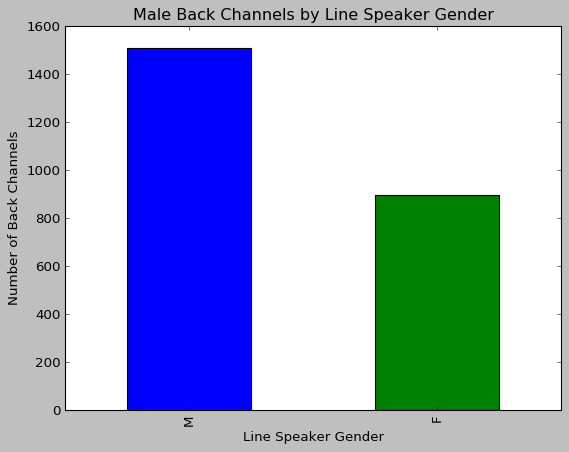

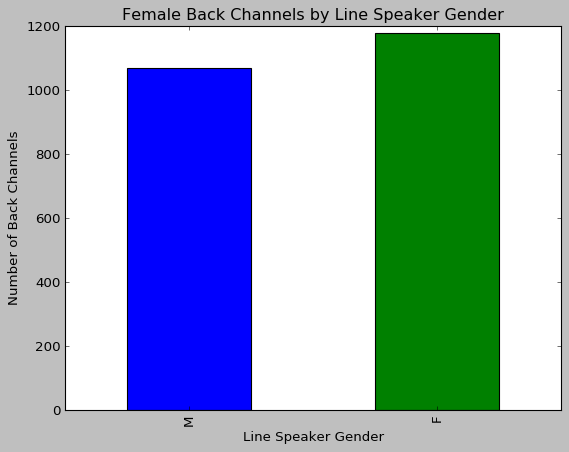

In [38]:
print("The Gender of the Line's Speaker during All Instances of Male Back Channels:")
M_bk_df["Line_Speaker_Gender"].value_counts().reindex(["M","F"])
print("The Gender of the Line's Speaker during All Instances of Female Back Channels:")
F_bk_df["Line_Speaker_Gender"].value_counts().reindex(["M","F"])

# creating bar graphs
fig1 = M_bk_df["Line_Speaker_Gender"].value_counts().reindex(["M","F"]).plot.bar()
plt.title("Male Back Channels by Line Speaker Gender")
plt.xlabel("Line Speaker Gender")
plt.ylabel("Number of Back Channels")
plt.show()

fig2 = F_bk_df["Line_Speaker_Gender"].value_counts().reindex(["M","F"]).plot.bar()
plt.title("Female Back Channels by Line Speaker Gender")
plt.xlabel("Line Speaker Gender")
plt.ylabel("Number of Back Channels")
plt.show()

# saving the figures
fig1.figure.savefig("images/male_back_channel_line_speaker_genders.png")
fig2.figure.savefig("images/female_back_channel_line_speaker_genders.png")


**Conclusion:** *Men* produce more Back Channels when *other men* are talking, and *Women* produce slightly more back channels when *other women* are talking.

### How do Male and Female Most Common Back Channels Compare?

Most Common Male Back Channels:


mm              332
yeah            295
laughs          224
yes             175
inaudible       175
right            96
laugh            81
yep              74
mhm              70
okay             42
uh               30
oh               29
um               17
no               16
ah               14
that's right     12
oh okay          10
well              9
thank you         8
alright           7
Name: Back_Channel, dtype: int64

Most Common Female Back Channels:


mm              293
yeah            281
laughs          226
yes             167
mhm             162
inaudible       128
right            78
laugh            69
yep              66
okay             48
oh               37
no               25
uh               22
oh okay          21
ah               13
that's right     12
thank you        12
alright          12
uhuh             11
well              9
Name: Back_Channel, dtype: int64

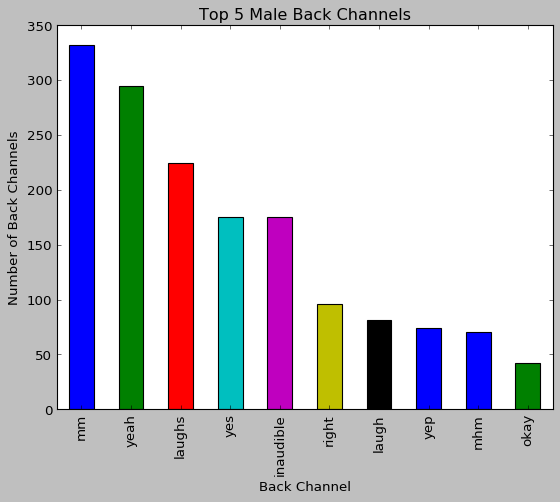

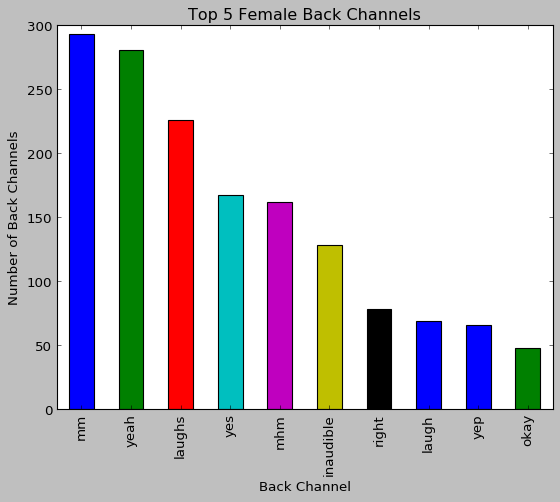

In [42]:
# Most Common Male and Female Back Channels
print("Most Common Male Back Channels:")
M_bk_df["Back_Channel"].value_counts()[:20]
print("Most Common Female Back Channels:")
F_bk_df["Back_Channel"].value_counts()[:20]

# creating graphs
fig1 = M_bk_df["Back_Channel"].value_counts()[:10].plot.bar()
plt.title("Top 5 Male Back Channels")
plt.xlabel("Back Channel")
plt.ylabel("Number of Back Channels")
plt.show()

fig2 = F_bk_df["Back_Channel"].value_counts()[:10].plot.bar()
plt.title("Top 5 Female Back Channels")
plt.xlabel("Back Channel")
plt.ylabel("Number of Back Channels")
plt.show()

# saving the figures
fig1.figure.savefig("images/top_10_male_back_channels.png")
fig2.figure.savefig("images/top_10_female_back_channels.png")

Female and Male Back Channels appear to be about the same

Next Question: How does Speaker Type Affect Men and Women's Back Channels?

## Presenter Gender Analysis

In [27]:
# Presenter Data Frame:
P_df
P_df["Name"].value_counts().sum()
len(P_df["Name"].unique())

,Segment,Speaker_Type,Gender,Name,Number_of_Utterances
Speaker,,,,,
ABCE1-P1,ABCE1,P,M,Simon Marnie,155
ABCE2-P1,ABCE2,P,M,Simon Marnie,233
ABCE3-P1,ABCE3,P,F,Lynne Haultain,129
ABCE3-P2,ABCE3,P,F,Jurate Sasnaitis,56
ABCE4-P1,ABCE4,P,F,Kelly Higgins-Devine,23
ABCNE1-P1,ABCNE1,P,M,Trevor Jackson,64
ABCNE2-P1,ABCNE2,P,M,Trevor Jackson,58
COME1-P1,COME1,P,M,Luke Bona,67
COME2-P1,COME2,P,M,Luke Bona,68


31

25

### Making Data Frames

In [28]:
# Male and Female Presenter Data Frames:
M_P_df=P_df.loc[P_df["Gender"]=='M',:]
F_P_df=P_df.loc[P_df["Gender"]=='F',:]

M_P_df
F_P_df

print("Number of Uninque Male IDs:")
M_P_df["Name"].value_counts().sum()
print("Number of Unique Male Presenters")
len(M_P_df["Name"].unique())

print("Number of Uninque Female IDs:")
F_P_df["Name"].value_counts().sum()
print("Number of Unique Female Presenters")
len(F_P_df["Name"].unique())

,Segment,Speaker_Type,Gender,Name,Number_of_Utterances
Speaker,,,,,
ABCE1-P1,ABCE1,P,M,Simon Marnie,155
ABCE2-P1,ABCE2,P,M,Simon Marnie,233
ABCNE1-P1,ABCNE1,P,M,Trevor Jackson,64
ABCNE2-P1,ABCNE2,P,M,Trevor Jackson,58
COME1-P1,COME1,P,M,Luke Bona,67
COME2-P1,COME2,P,M,Luke Bona,68
COME3-P1,COME3,P,M,Luke Bona,61
COME5-P1,COME5,P,M,Spencer,65
COME6-P1,COME6,P,M,Paul Murray,116


,Segment,Speaker_Type,Gender,Name,Number_of_Utterances
Speaker,,,,,
ABCE3-P1,ABCE3,P,F,Lynne Haultain,129
ABCE3-P2,ABCE3,P,F,Jurate Sasnaitis,56
ABCE4-P1,ABCE4,P,F,Kelly Higgins-Devine,23
COME5-P2,COME5,P,F,Sharina,491
COMNE7-P1,COMNE7,P,F,Nicole Haack,61
NAT2-P2,NAT2,P,F,Ramona Koval,46
NAT3-P1,NAT3,P,F,Julie McCrossin,103
NAT6-P1,NAT6,P,F,Mel Bampton,88
NAT7-P1,NAT7,P,F,Rosie Beaton,224


Number of Uninque Male IDs:


21

Number of Unique Male Presenters


15

Number of Uninque Female IDs:


10

Number of Unique Female Presenters


10

### Presenter Distribution
- 31 Unique Speaker Ids
    - 21 Male Ids
    - 10 Female Ids
- 25 Unique Speakers
    - 15 Males
    - 10 Females
    
There are 10 unique Female IDs and 10 unique Female Presenters - **no Female presents twice.**

There are 21 unique Male IDs and 15 unique Male Presenters - Multiple Males present twice and 1 presents 3 times.

There are about twice as many Male Presenters as Female Presenters, but about equal numbers of Male and Female Callers. Therefore, I will continue with a brief analysis but continue with Callers by Gender instead of Presenters.

In [29]:
# Male and Female Presenter Lines Data Frames:
M_P_art_df=P_art_df.loc[P_art_df["Gender"]=='M',:]
F_P_art_df=P_art_df.loc[P_art_df["Gender"]=='F',:]

M_P_art_df.head()
F_P_art_df.head()

Segment Speaker_Type Gender  \
Speaker  Utterance_Number                               
ABCE1-P1 1                  ABCE1            P      M   
         3                  ABCE1            P      M   
         5                  ABCE1            P      M   
         6                  ABCE1            P      M   
         8                  ABCE1            P      M   

                                                                        Text  \
Speaker  Utterance_Number                                                      
ABCE1-P1 1                 Thanks for that John Hall now John Hall will b...   
         3                 He's also known <E1 sounds reasonable> for his...   
         5                 Jeanne Villani does and we'll find out the sec...   
         6                 Eight-triple-three-one-thousand one-eight-hund...   
         8                                                      How are you.   

                                                                   Word_Toks  \
Speaker  Utterance_Number                                                      
ABCE1-P1 1                 ['Thanks', 'for', 'that', 'John', 'Hall', 'now...   
         3                 ['He', "'s", 'also', 'known', 'for', 'his', 'a...   
         5                 ['Jeanne', 'Villani', 'does', 'and', 'we', "'l...   
         6                 ['Eight-triple-three-one-thousand', 'one-eight...   
         8                                        ['How', 'are', 'you', '.']   

                           Num_Words  Avg_Word_Length  \
Speaker  Utterance_Number                               
ABCE1-P1 1                        80         4.700000   
         3                       159         5.062893   
         5                        50         3.980000   
         6                        13         8.692308   
         8                         4         2.500000   

                                                                       Sents  \
Speaker  Utterance_Number                                                      
ABCE1-P1 1                 ["Thanks for that John Hall now John Hall will...   
         3                 ["He's also known  for his ability to open cos...   
         5                 ["Jeanne Villani does and we'll find out the s...   
         6                 ["Eight-triple-three-one-thousand one-eight-hu...   
         8                                                  ['How are you.']   

                           Num_Sents  
Speaker  Utterance_Number             
ABCE1-P1 1                         2  
         3                         3  
         5                         1  
         6                         1  
         8                         1

,,Segment,Speaker_Type,Gender,Text,Word_Toks,Num_Words,Avg_Word_Length,Sents,Num_Sents
Speaker,Utterance_Number,,,,,,,,,
ABCE3-P1,1,ABCE3,P,F,If you haven't been with us before this how it...,"['If', 'you', 'have', ""n't"", 'been', 'with', '...",31,4.290323,"[""If you haven't been with us before this how ...",1
ABCE3-P2,2,ABCE3,P,F,Good afternoon Lynne.,"['Good', 'afternoon', 'Lynne', '.']",4,4.750000,['Good afternoon Lynne.'],1
ABCE3-P1,3,ABCE3,P,F,<laughs> It's like being at school. And we tal...,"['It', ""'s"", 'like', 'being', 'at', 'school', ...",50,3.420000,"["" It's like being at school."", ""And we talk a...",2
ABCE3-P2,4,ABCE3,P,F,And so yes.,"['And', 'so', 'yes', '.']",4,2.250000,['And so yes.'],1
ABCE3-P1,5,ABCE3,P,F,Wo we run.,"['Wo', 'we', 'run', '.']",4,2.000000,['Wo we run.'],1


### Presenter Gender Statistics

In [30]:
# utterances
print("Number of Utterances:")
P_art_df["Gender"].value_counts().reindex(["M","F"])

# sentences:
print("Number of Sentences:")
M_P_art_df["Num_Sents"].sum()
F_P_art_df["Num_Sents"].sum()

# words
print("Number of Words:")
M_P_art_df["Num_Words"].sum()
F_P_art_df["Num_Words"].sum() 

# avg word length
print("Average Word Length:")
M_P_art_df["Avg_Word_Length"].mean()
F_P_art_df["Avg_Word_Length"].mean()

# avg sent length
print("Average Sentence Length:")
M_P_art_df["Num_Words"].sum()/M_P_art_df["Num_Sents"].sum()
F_P_art_df["Num_Words"].sum()/F_P_art_df["Num_Sents"].sum()

print("Average Number of Turns:")
M_P_df["Number_of_Utterances"].mean()
F_P_df["Number_of_Utterances"].mean()

Number of Utterances:


M    2120
F    1409
Name: Gender, dtype: int64

Number of Sentences:


3110

2166

Number of Words:


49334

37948

Average Word Length:


3.5423013416033178

3.4546074112542988

Average Sentence Length:


15.863022508038584

17.519852262234533

Average Number of Turns:


100.95238095238095

140.90000000000001

Because there are about twice as many Male Presenters as Female Presenters, I cannot compare their raw scores directly. However, looking looking at Average Word Length, Average Sentence Length, and Average Number of Turns, it seems that Women talk more on average than Men, because **Females have a longer average sentence length and more number of turns.**

## Caller Gender Back Channel Analysis

### Data Frame of Caller Back Channels

In [31]:
# Caller's saying back channels
print("Callers Uttering Back Channels:")
C_bk_df=bk_df.loc[bk_df["Speaker_Type"]=='C',:]
C_bk_df.head()

Callers Uttering Back Channels:


,Speaker,Speaker_Type,Speaker_Gender,Back_Channel,Line_Speaker,Segment_Utterance_Number,Segment,Line_Speaker_Type,Line_Speaker_Gender
,,,,,,,,,
1,ABCE1-C1,C,F,laughs,ABCE1-P1,10,ABCE1,P,M
7,ABCE1-C1,C,F,mhm,ABCE1-P1,14,ABCE1,P,M
8,ABCE1-C1,C,F,uh,ABCE1-E1,23,ABCE1,E,M
11,ABCE1-C1,C,F,laugh,ABCE1-C1,24,ABCE1,C,F
14,ABCE1-C1,C,F,mm,ABCE1-E1,31,ABCE1,E,M


In [32]:
print("All Instances of Male and Female Callers Contributing Back Channels:") 
C_bk_df["Speaker_Gender"].value_counts().reindex(["M","F"])
print("All Male and Female Lines that Contained Caller Back Channels") 
C_bk_df["Line_Speaker_Gender"].value_counts().reindex(["M","F"])

All Instances of Male and Female Callers Contributing Back Channels:


M     541
F    1150
Name: Speaker_Gender, dtype: int64

All Male and Female Lines that Contained Caller Back Channels


M    821
F    870
Name: Line_Speaker_Gender, dtype: int64

### Observations: 

- Females uttered twice as many back channels.
- More Females Lines had Female Caller Back Channels.
     - **Conclusion:** *Female Callers* are more likely to utter Back Channels when talking to *other females.*

### Data Frame of Caller Lines with Back Channels

In [33]:
# Caller lines that include back channels
print("Caller Lines that Include Back Channels:")
C_line_bk_df=bk_df.loc[bk_df["Line_Speaker_Type"]=='C',:]
C_line_bk_df.head()

Caller Lines that Include Back Channels:


,Speaker,Speaker_Type,Speaker_Gender,Back_Channel,Line_Speaker,Segment_Utterance_Number,Segment,Line_Speaker_Type,Line_Speaker_Gender
,,,,,,,,,
2,ABCE1-P1,P,M,yes,ABCE1-C1,11,ABCE1,C,F
3,ABCE1-E1,E,M,mm,ABCE1-C1,11,ABCE1,C,F
4,ABCE1-E1,E,M,mm,ABCE1-C1,11,ABCE1,C,F
5,ABCE1-E1,E,M,mm,ABCE1-C1,11,ABCE1,C,F
6,ABCE1-P1,P,M,mm,ABCE1-C1,13,ABCE1,C,F


In [34]:
print("All Caller Lines that Contained Back Channels (by Any Speaker Type):")
C_line_bk_df["Speaker_Gender"].value_counts().reindex(["M","F"])
print("All Instances of Male and Female Caller Lines that Contained Back Channels:")
C_line_bk_df["Line_Speaker_Gender"].value_counts().reindex(["M","F"])

All Caller Lines that Contained Back Channels (by Any Speaker Type):


M    814
F    640
Name: Speaker_Gender, dtype: int64

All Instances of Male and Female Caller Lines that Contained Back Channels:


M    711
F    743
Name: Line_Speaker_Gender, dtype: int64

### Observations

- Of the Caller Lines that contained Back Channels, more of those back channels came from Males.
    - **Conclusion:** *Males* are more likely to contribute a back channel to a *Caller* than Females are.
- Of the Caller Lines that contained Back Channels, more Female Caller Lines contained back channels.
    - **Conclusion:** *Speakers* are more likely to contribute a back channel to a *Female Caller* than Male Callers.
    
But are Male and Female Callers as contributing more back channels to speakers of the same gender or different genders?

In [35]:
print("Male Callers Uttering Back Channels during Male and Female Lines:")
# Back Channels by Male Callers
CM=C_bk_df.loc[(C_bk_df["Speaker_Gender"]=='M') & (C_bk_df["Speaker_Type"]=="C"),:]
# uttered during Male and Female Lines
CM["Line_Speaker_Gender"].value_counts().reindex(["M","F"])

print("Female Callers Uttering Back Channels during Male and Female Lines:")
# Back Channels by Female Callers
CF=C_bk_df.loc[(C_bk_df["Speaker_Gender"]=='F') & (C_bk_df["Speaker_Type"]=="C"),:]
# uttered during Male and Female Lines
CF["Line_Speaker_Gender"].value_counts().reindex(["M","F"])

Male Callers Uttering Back Channels during Male and Female Lines:


M    318
F    223
Name: Line_Speaker_Gender, dtype: int64

Female Callers Uttering Back Channels during Male and Female Lines:


M    503
F    647
Name: Line_Speaker_Gender, dtype: int64

Male Callers are more likely to utter back channels during Male Lines

Female Callers are more likely to utter back channels during other Female Lines